#### PROBLEM STATEMENT 1
predicting turbine energy yield (TEY) using ambient variables as features.


#### Importing libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV


Bad key mathtext.fallback_to_cm in file C:\Users\mohit\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\mohit\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key keymap.all_axes in file C:\Users\mohit\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-dat

#### Reading the data

In [3]:
gas = pd.read_csv('E:\\deeksha\\python\\data\\gas_turbines.csv')

In [4]:
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [7]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:
corr = gas.corr()

#### Visulization of data parameters

C:\Users\mohit\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


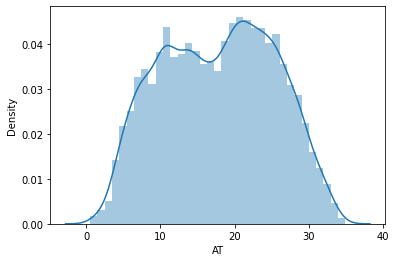

In [10]:
sns.distplot(gas['AT'])
import warnings
warnings.filterwarnings('ignore')

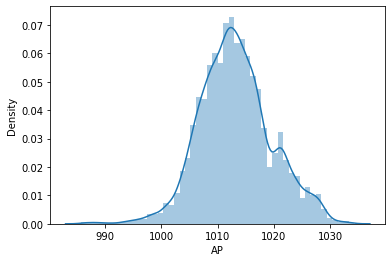

In [11]:
sns.distplot(gas['AP'])
import warnings
warnings.filterwarnings('ignore')

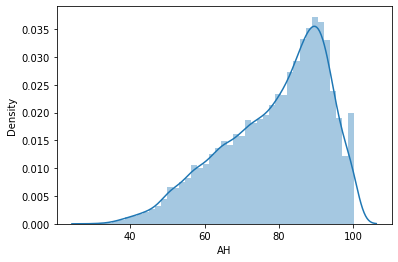

In [12]:
sns.distplot(gas['AH'])
import warnings
warnings.filterwarnings('ignore')

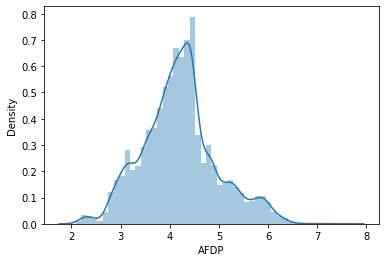

In [13]:
sns.distplot(gas['AFDP'])
import warnings
warnings.filterwarnings('ignore')

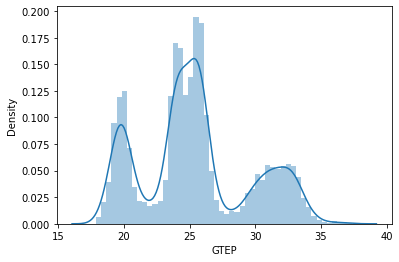

In [14]:
sns.distplot(gas['GTEP'])
import warnings
warnings.filterwarnings('ignore')

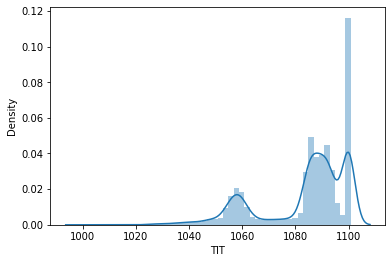

In [15]:
sns.distplot(gas['TIT'])
import warnings
warnings.filterwarnings('ignore')

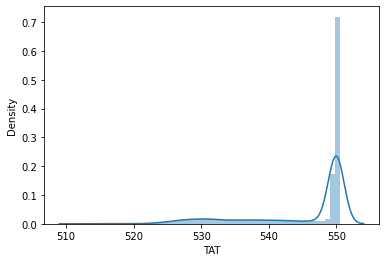

In [16]:
sns.distplot(gas['TAT'])
import warnings
warnings.filterwarnings('ignore')

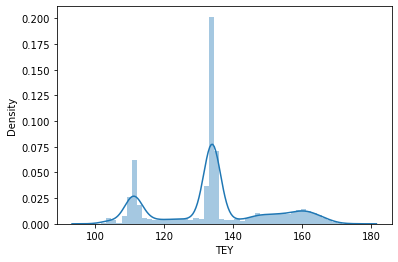

In [17]:
sns.distplot(gas['TEY'])
import warnings
warnings.filterwarnings('ignore')

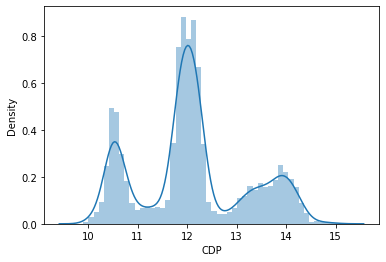

In [18]:
sns.distplot(gas['CDP'])
import warnings
warnings.filterwarnings('ignore')

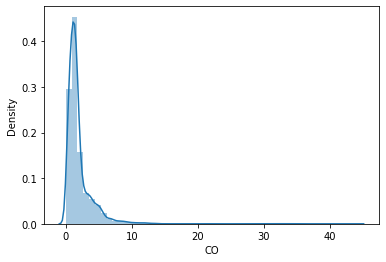

In [19]:
sns.distplot(gas['CO'])
import warnings
warnings.filterwarnings('ignore')

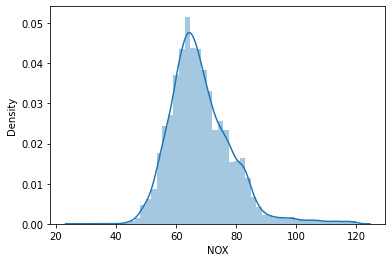

In [11]:
sns.distplot(gas['NOX'])
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gas.shape, gas.size

In [ ]:
## HeatMap

In [13]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
## pairplot

In [ ]:
sns.pairplot(gas)

In [ ]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=gas, orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

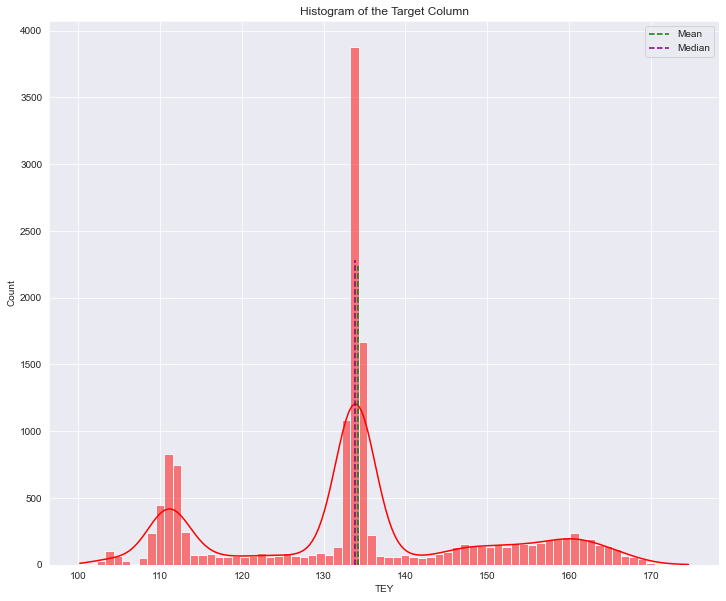

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=gas,x="TEY",color="red",kde=True)
plt.axvline(x=gas["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=gas["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

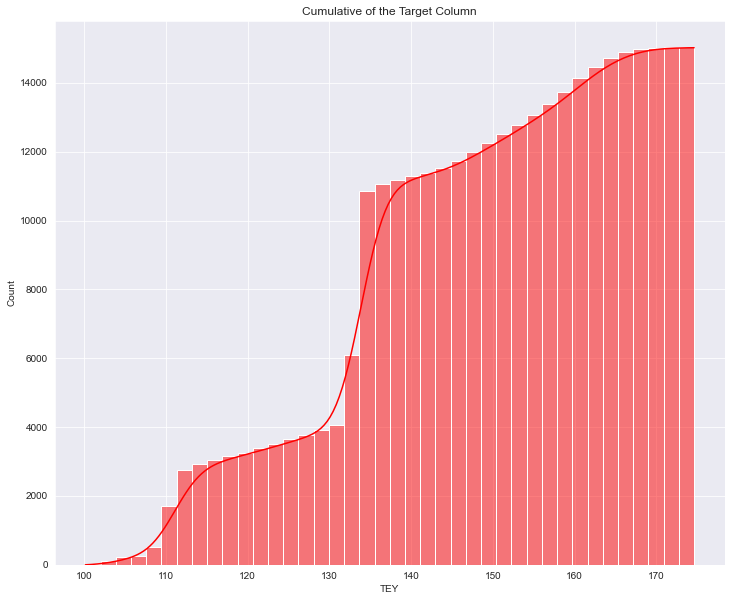

In [15]:
plt.figure(figsize = (12,10))
sns.histplot(gas["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

In [16]:
model_data = gas[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [17]:
x = gas.drop(['TEY'],axis=1)

In [18]:
y = gas['TEY']

In [19]:
x.shape, y.shape

((15039, 10), (15039,))

#### Splitting the data into train, test

In [21]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.30,random_state=12)

In [22]:
x_train

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
11629,32.3130,1010.5,38.015,4.6424,31.230,1100.0,536.31,13.508,0.6211,58.097
4597,27.6930,1017.3,54.875,3.5559,20.594,1061.7,550.10,10.719,3.4761,52.384
4532,30.9080,1010.3,51.289,4.5602,26.725,1096.2,549.89,12.432,0.8664,67.263
7531,12.1870,1017.2,92.389,2.8928,24.009,1084.1,550.20,11.792,1.6454,72.874
11594,20.2600,1005.6,86.535,3.1074,20.254,1060.3,549.97,10.671,1.6159,58.828
...,...,...,...,...,...,...,...,...,...,...
7409,1.7359,1013.7,84.242,3.1256,19.408,1058.8,550.07,10.650,4.4532,104.500
3325,25.2290,1011.6,86.805,4.1153,25.639,1090.0,550.04,12.052,1.9004,59.325
9606,11.8390,1015.6,90.342,4.3896,24.022,1085.8,550.18,11.921,1.1484,74.475
5787,14.3700,1013.6,81.577,3.3633,19.074,1054.4,550.00,10.343,6.2460,74.181


In [23]:
x_train.shape, y_train.shape

((10527, 10), (10527,))

In [24]:
x_train

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
11629,32.3130,1010.5,38.015,4.6424,31.230,1100.0,536.31,13.508,0.6211,58.097
4597,27.6930,1017.3,54.875,3.5559,20.594,1061.7,550.10,10.719,3.4761,52.384
4532,30.9080,1010.3,51.289,4.5602,26.725,1096.2,549.89,12.432,0.8664,67.263
7531,12.1870,1017.2,92.389,2.8928,24.009,1084.1,550.20,11.792,1.6454,72.874
11594,20.2600,1005.6,86.535,3.1074,20.254,1060.3,549.97,10.671,1.6159,58.828
...,...,...,...,...,...,...,...,...,...,...
7409,1.7359,1013.7,84.242,3.1256,19.408,1058.8,550.07,10.650,4.4532,104.500
3325,25.2290,1011.6,86.805,4.1153,25.639,1090.0,550.04,12.052,1.9004,59.325
9606,11.8390,1015.6,90.342,4.3896,24.022,1085.8,550.18,11.921,1.1484,74.475
5787,14.3700,1013.6,81.577,3.3633,19.074,1054.4,550.00,10.343,6.2460,74.181


#### Convert Data into standard scale

In [25]:
y_train

11629    150.96
4597     110.78
4532     134.78
7531     133.05
11594    113.18
          ...  
7409     113.45
3325     132.67
9606     133.68
5787     110.04
14155    162.55
Name: TEY, Length: 10527, dtype: float64

#### Convert Data into standard scale

In [26]:
scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_train_scaled

array([[0.92466704, 0.50666112, 0.10981161, ..., 0.69470538, 0.014001  ,
        0.33072017],
       [0.79028932, 0.64820983, 0.35116525, ..., 0.15340424, 0.0787412 ,
        0.26842937],
       [0.88380109, 0.50249792, 0.29983108, ..., 0.48587066, 0.01956344,
        0.4306602 ],
       ...,
       [0.32915851, 0.61282265, 0.85888113, ..., 0.38669358, 0.02595809,
        0.5092951 ],
       [0.40277539, 0.57119067, 0.73340873, ..., 0.08042854, 0.14155168,
        0.50608952],
       [0.30501706, 0.75853455, 0.62823523, ..., 0.81484357, 0.0190623 ,
        0.42085809]])

In [27]:
x_test_scaled = scale.fit_transform(x_test)
x_test_scaled

array([[0.48901631, 0.64730729, 0.79559177, ..., 0.14251161, 0.2722068 ,
        0.36474603],
       [0.42593371, 0.7001056 , 0.80973386, ..., 0.32060235, 0.05263161,
        0.26401103],
       [0.18358237, 0.55860612, 0.88941321, ..., 0.34498498, 0.0277572 ,
        0.50666754],
       ...,
       [0.2904598 , 0.76768743, 0.90370186, ..., 0.1300277 , 0.11084235,
        0.55078094],
       [0.30325196, 0.79725449, 0.39893898, ..., 0.8041587 , 0.01123793,
        0.26743667],
       [0.37655072, 0.48468849, 0.99897415, ..., 0.28471111, 0.73249871,
        0.35924662]])

### Model Training

Tuning of Hyperparameter : Batch size and Epoch

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense




In [3]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [30]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from kerastuner.tuners import RandomSearch
from keras.optimizers import Adam
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')


Reloading Tuner from project\Gas Turbine\tuner0.json


In [32]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')


Reloading Tuner from project\Gas Turbine\tuner0.json


In [33]:
tuner.search_space_summary()


Search space summary
Default search space size: 17
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_6

In [34]:
tuner.search(x_train, y_train,epochs=50,validation_data=(x_test, y_test))

In [35]:
tuner.results_summary()


Results summary
Results in project\Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 3 summary
Hyperparameters:
num_layers: 2
units_0: 96
units_1: 64
learning_rate: 0.001
units_2: 32
units_3: 96
units_4: 96
units_5: 32
units_6: 96
units_7: 96
units_8: 64
units_9: 32
units_10: 64
units_11: 96
units_12: 32
units_13: 64
units_14: 32
Score: 0.6395236651102701

Trial 0 summary
Hyperparameters:
num_layers: 13
units_0: 64
units_1: 32
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
Score: 0.7329615751902262

Trial 1 summary
Hyperparameters:
num_layers: 15
units_0: 64
units_1: 32
learning_rate: 0.001
units_2: 96
units_3: 64
units_4: 64
units_5: 32
units_6: 64
units_7: 96
units_8: 32
units_9: 64
units_10: 96
units_11: 96
units_12: 64
units_13: 32
units_14: 32
Score: 0.768700897693634

Trial 2 summary
Hyperparameters:
num_layers: 2
units_0

#### Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [36]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=10,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [37]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20]
epochs=[10,50,100]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [38]:
grid

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000023097498B48>,
             param_grid={'batch_size': [10, 20], 'epochs': [10, 50, 100]},
             verbose=10)

In [39]:
grid_result = grid.fit(x_test_scaled,y_test)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=10, epochs=10....................................
[CV 1/5; 1/6] END ....batch_size=10, epochs=10;, score=-1.052 total time=  21.9s
[CV 2/5; 1/6] START batch_size=10, epochs=10....................................
[CV 2/5; 1/6] END ....batch_size=10, epochs=10;, score=-1.606 total time=  19.6s
[CV 3/5; 1/6] START batch_size=10, epochs=10....................................
[CV 3/5; 1/6] END ....batch_size=10, epochs=10;, score=-1.665 total time=  18.0s
[CV 4/5; 1/6] START batch_size=10, epochs=10....................................
[CV 4/5; 1/6] END ....batch_size=10, epochs=10;, score=-2.311 total time=  19.5s
[CV 5/5; 1/6] START batch_size=10, epochs=10....................................
[CV 5/5; 1/6] END ....batch_size=10, epochs=10;, score=-1.038 total time=  20.1s
[CV 1/5; 2/6] START batch_size=10, epochs=50....................................
[CV 1/5; 2/6] END ....batch_size=10, epochs=50;, 